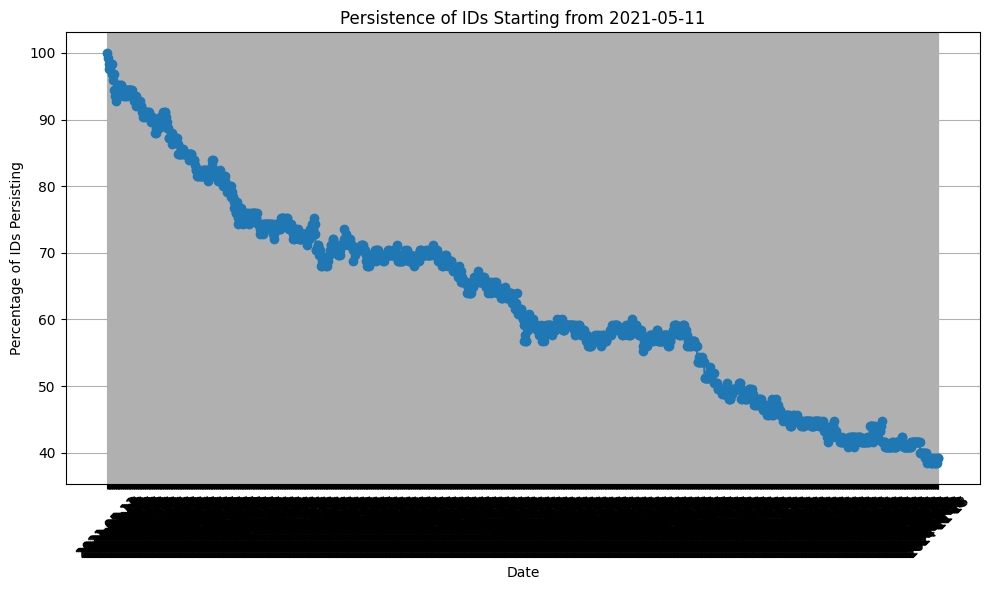

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the rotated CSV file
file_path = 'rotated_cryptocurrency_ids.csv'  # Replace with the path to your file
data = pd.read_csv(file_path, index_col='Date')

def calculate_id_persistence(data, start_dates):
    """
    Calculate the percentage of IDs from a start date that persist in the subsequent dates.

    Parameters:
        data (DataFrame): Rotated cryptocurrency data where dates are rows and ranks are columns.
        start_dates (list): List of dates to analyze persistence.

    Returns:
        persistence_data (dict): Dictionary with dates as keys and persistence percentages as values.
    """
    persistence_data = {}
    
    # Loop through each start date
    for start_date in start_dates:
        if start_date not in data.index:
            print(f"Date {start_date} not found in the dataset.")
            continue
        
        # Get the IDs for the start date
        start_ids = set(data.loc[start_date].dropna())
        
        # Initialize dictionary for the current start date
        persistence_data[start_date] = []
        
        # Loop through all subsequent dates
        for current_date in data.index:
            if current_date < start_date:
                continue
            
            # Get the IDs for the current date
            current_ids = set(data.loc[current_date].dropna())
            
            # Calculate the percentage of IDs from the start date that persist in the current date
            common_ids = start_ids & current_ids
            persistence_percentage = (len(common_ids) / len(start_ids)) * 100
            persistence_data[start_date].append((current_date, persistence_percentage))
    
    return persistence_data

def plot_persistence(persistence_data, start_date):
    """
    Plot the persistence percentages for a given start date.

    Parameters:
        persistence_data (dict): Persistence data generated by calculate_id_persistence.
        start_date (str): The specific start date to plot.
    """
    if start_date not in persistence_data:
        print(f"No persistence data available for {start_date}.")
        return

    # Extract data for plotting
    dates, percentages = zip(*persistence_data[start_date])

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(dates, percentages, marker='o')
    plt.title(f"Persistence of IDs Starting from {start_date}")
    plt.xlabel("Date")
    plt.ylabel("Percentage of IDs Persisting")
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

# Example usage
start_dates = ['2021-05-11']  # Replace with your list of dates
persistence_data = calculate_id_persistence(data, start_dates)
plot_persistence(persistence_data, '2021-05-11')